This is the second version of my public kernel(Intrusion Detection System). ANN is also trained & tested on the dataset in this version.
I would really appreciate your feedback.

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing

In [13]:
with open("./raw/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [14]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
42


In [15]:
with open("./raw/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [16]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [17]:
path = "./raw/kddcup.data_10_percent"
df = pd.read_csv(path,names=columns)
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0  ...                   9   
1                    0       0    0  ...                  19   
2                    0       0    0  ...                  29   
3                    0       0    0  ...                  39   
4                    0       0    0  ...                  49   
...                ...     ...  ...  ...                 ...   
494016               0       0    0  ...                 255   
494017               0       0    0  ...                 255   
494018               0       0    0  ...                 255   
494019               0       0    0  ...                 255   
494020               0       0    0  ...                 255   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                          1.0                     0.0   
1                          1.0                     0.0   
2                          1.0                     0.0   
3                          1.0                     0.0   
4                          1.0                     0.0   
...                        ...                     ...   
494016                     1.0                     0.0   
494017                     1.0                     0.0   
494018                     1.0                     0.0   
494019                     1.0                     0.0   
494020                     1.0                     0.0   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.11                         0.00   
1                              0.05                         0.00   
2                              0.03                         0.00   
3                              0.03                         0.00   
4                              0.02                         0.00   
...                             ...                          ...   
494016                         0.01                         0.05   
494017                         0.17                         0.05   
494018                         0.06                         0.05   
494019                         0.04                         0.05   
494020                         0.17                         0.05   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                   0.0   
1                       0.00                      0.00                   0.0   
2                       0.00                      0.00                   0.0   
3                       0.00                      0.00                   0.0   
4                       0.00                      0.00                   0.0   
...                      ...                       ...                   ...   
494016                  0.00                      0.01                   0.0   
494017                  0.00                      0.01                   0.0   
494018                  0.06                      0.01                   0.0   
494019                  

In [18]:
target1=df['target']
le = preprocessing.LabelEncoder()
#小类标签数字化，共23小类
labels_23_category =le.fit_transform(target1).astype(np.int64)
df["target_digit"]= labels_23_category
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                     1.0   
1                    0       0    0  ...                     1.0   
2                    0       0    0  ...                     1.0   
3                    0       0    0  ...                     1.0   
4                    0       0    0  ...                     1.0   
...                ...     ...  ...  ...                     ...   
494016               0       0    0  ...                     1.0   
494017               0       0    0  ...                     1.0   
494018               0       0    0  ...                     1.0   
494019               0       0    0  ...                     1.0   
494020               0       0    0  ...                     1.0   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                          0.0                         0.11   
1                          0.0                         0.05   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.02   
...                        ...                          ...   
494016                     0.0                         0.01   
494017                     0.0                         0.17   
494018                     0.0                         0.06   
494019                     0.0                         0.04   
494020                     0.0                         0.17   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  0.00   
3                              0.00                  0.00   
4                              0.00                  0.00   
...                             ...                   ...   
494016                         0.05                  0.00   
494017                         0.05                  0.00   
494018                         0.05                  0.06   
494019                         0.05                  0.04   
494020                         0.05                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                   0.0   
1                           0.00                   0.0   
2                           0.00                   0.0   
3                           0.00                   0.0   
4                           0.00                   0.0   
...                          ...                   ...   
494016                      0.01                   0.0   
494017                      0.01                   0.0   
494018                      0.01                   0.0   
494019                      0.01                   0.0   
494020                      0.01                   0.0   

        dst_host_srv_rerror_rate   target  target_digit  
0                            0.0  normal.    

In [19]:
#添加大类标签，共五大类
df['attack_type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                     0.0   
1               0       0    0  ...                     0.0   
2               0       0    0  ...                     0.0   
3               0       0    0  ...                     0.0   
4               0       0    0  ...                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate   target  target_digit  attack_type  
0                       0.0  normal.            11       normal  
1                       0.0  normal.            11       normal  
2                       0.0  normal.            11       normal  
3                       0.0  normal.            11       normal  
4                       0.0  normal.            11       normal  

[5 rows x 44 columns]

In [20]:
target2=df["attack_type"]
le = preprocessing.LabelEncoder()
#小类标签数字化
labels_5_category =le.fit_transform(target2).astype(np.int64)
df["attack_type_digit"]=labels_5_category
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_src_port_rate  \
0                    0       0    0  ...                         0.11   
1                    0       0    0  ...                         0.05   
2                    0       0    0  ...                         0.03   
3                    0       0    0  ...                         0.03   
4                    0       0    0  ...                         0.02   
...                ...     ...  ...  ...                          ...   
494016               0       0    0  ...                         0.01   
494017               0       0    0  ...                         0.17   
494018               0       0    0  ...                         0.06   
494019               0       0    0  ...                         0.04   
494020               0       0    0  ...                         0.17   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  0.00   
3                              0.00                  0.00   
4                              0.00                  0.00   
...                             ...                   ...   
494016                         0.05                  0.00   
494017                         0.05                  0.00   
494018                         0.05                  0.06   
494019                         0.05                  0.04   
494020                         0.05                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                   0.0   
1                           0.00                   0.0   
2                           0.00                   0.0   
3                           0.00                   0.0   
4                           0.00                   0.0   
...                          ...                   ...   
494016                      0.01                   0.0   
494017                      0.01                   0.0   
494018                      0.01                   0.0   
494019                      0.01                   0.0   
494020                      0.01                   0.0   

        dst_host_srv_rerror_rate   target  target_digit  attack_type  \
0                            0.0  normal.            11       normal   
1                            0.0  normal.            11       normal   
2                            0.0  normal.            11       normal   
3                            0.0  normal.            11       normal   
4                            0.0  normal.            11       normal   
...                          ...      ...           ...          ...   
494016                       0.0  normal.            11       normal   
494017                       0.0  normal.            11       normal   
494018                       0.0  normal.            11       normal   
494019                       0.0  normal.            11       normal   
494020  

In [21]:
#保留这个数据，后面用于合并到处理后的数据中保存
labels=df[['target','target_digit','attack_type','attack_type_digit']]
labels


target  target_digit attack_type  attack_type_digit
0       normal.            11      normal                  1
1       normal.            11      normal                  1
2       normal.            11      normal                  1
3       normal.            11      normal                  1
4       normal.            11      normal                  1
...         ...           ...         ...                ...
494016  normal.            11      normal                  1
494017  normal.            11      normal                  1
494018  normal.            11      normal                  1
494019  normal.            11      normal                  1
494020  normal.            11      normal                  1

[494021 rows x 4 columns]

In [22]:
df.drop(columns=['target_digit', 'attack_type_digit'],inplace=True)
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                     1.0   
1                    0       0    0  ...                     1.0   
2                    0       0    0  ...                     1.0   
3                    0       0    0  ...                     1.0   
4                    0       0    0  ...                     1.0   
...                ...     ...  ...  ...                     ...   
494016               0       0    0  ...                     1.0   
494017               0       0    0  ...                     1.0   
494018               0       0    0  ...                     1.0   
494019               0       0    0  ...                     1.0   
494020               0       0    0  ...                     1.0   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                          0.0                         0.11   
1                          0.0                         0.05   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.02   
...                        ...                          ...   
494016                     0.0                         0.01   
494017                     0.0                         0.17   
494018                     0.0                         0.06   
494019                     0.0                         0.04   
494020                     0.0                         0.17   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  0.00   
3                              0.00                  0.00   
4                              0.00                  0.00   
...                             ...                   ...   
494016                         0.05                  0.00   
494017                         0.05                  0.00   
494018                         0.05                  0.06   
494019                         0.05                  0.04   
494020                         0.05                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                   0.0   
1                           0.00                   0.0   
2                           0.00                   0.0   
3                           0.00                   0.0   
4                           0.00                   0.0   
...                          ...                   ...   
494016                      0.01                   0.0   
494017                      0.01                   0.0   
494018                      0.01                   0.0   
494019                      0.01                   0.0   
494020                      0.01                   0.0   

        dst_host_srv_rerror_rate   target  attack_type  
0                            0.0  normal.     

In [23]:
#后面四列是标签
df.shape

(494021, 43)

In [24]:
df['target'].value_counts() #统计标签数量

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

<Axes: xlabel='attack_type', ylabel='count'>

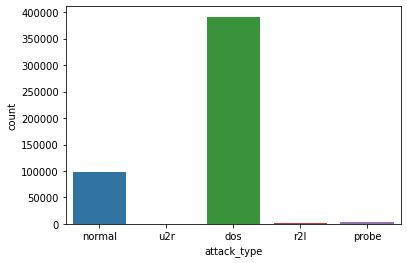

In [25]:
sns.countplot(x='attack_type', data=df)

In [26]:
df['attack_type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: attack_type, dtype: int64

In [27]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING

In [28]:
df.isnull().sum() #查看控制个数

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [29]:
df._get_numeric_data().columns  #获取数字列，

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [30]:
#Finding categorical features  #找到非数字特征
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('attack_type')
cate_cols

['service', 'flag', 'protocol_type']

In [31]:
list(set(df.columns)-set(num_cols)) #非数字的列名

['target', 'service', 'flag', 'protocol_type', 'attack_type']

CATEGORICAL FEATURES DISTRIBUTION

In [32]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

In [33]:
type(df['protocol_type'].value_counts())

pandas.core.series.Series

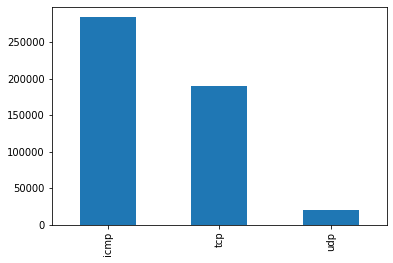

In [34]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

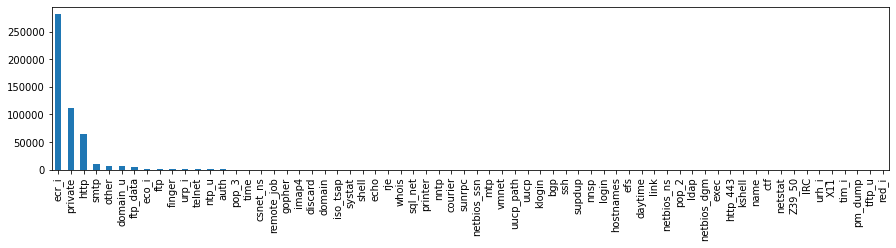

In [35]:
plt.figure(figsize=(15,3))
bar_graph('service')

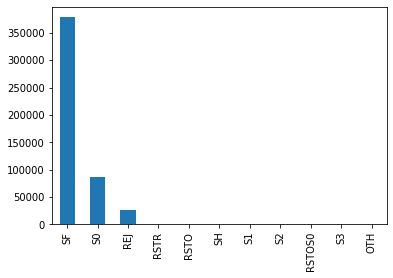

In [36]:
bar_graph('flag')

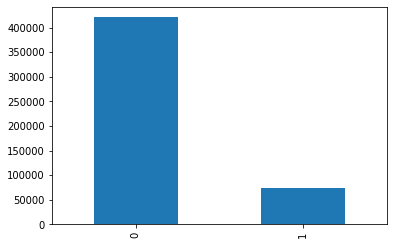

In [37]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

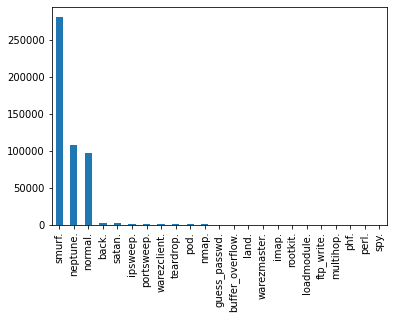

In [38]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

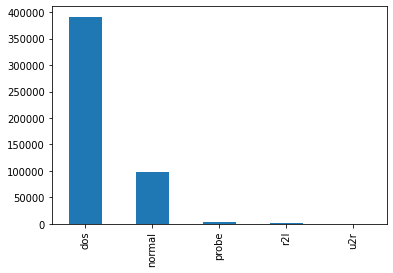

In [39]:
bar_graph('attack_type')

In [40]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'attack_type'],
      dtype='object')

DATA CORRELATION

<ipython-input-41-5d24c31dabea>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN
<ipython-input-41-5d24c31dabea>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


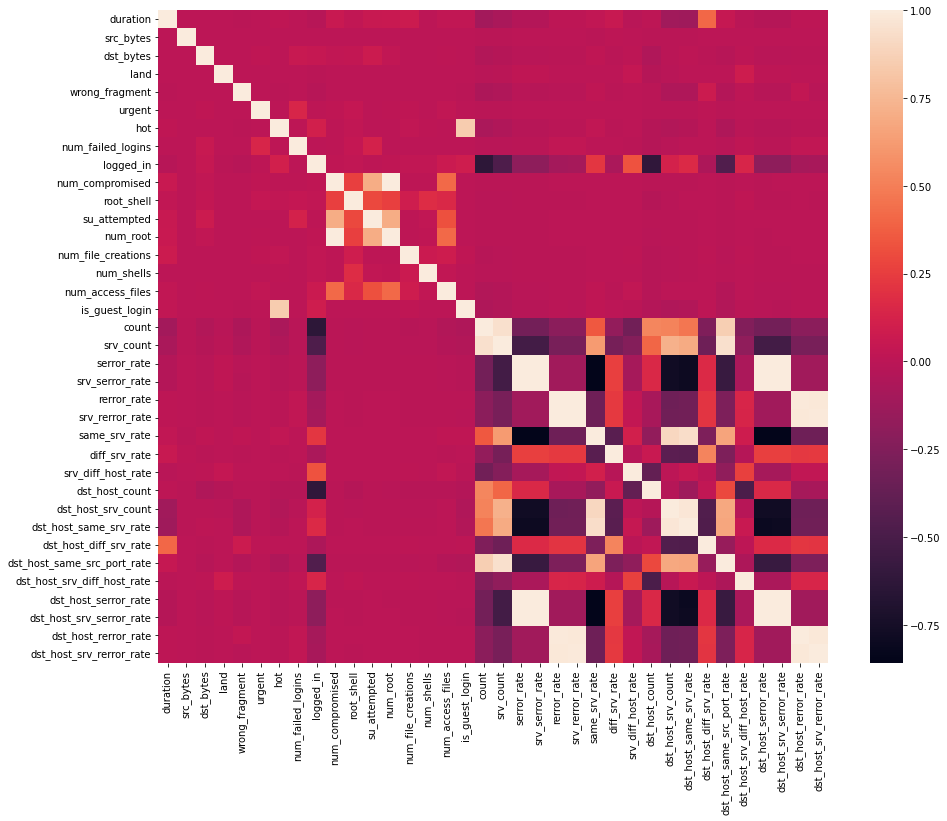

In [41]:
#去除空值、删除只有唯一值的列，查看列之间的相关性
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [42]:
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                     1.0   
1                    0       0    0  ...                     1.0   
2                    0       0    0  ...                     1.0   
3                    0       0    0  ...                     1.0   
4                    0       0    0  ...                     1.0   
...                ...     ...  ...  ...                     ...   
494016               0       0    0  ...                     1.0   
494017               0       0    0  ...                     1.0   
494018               0       0    0  ...                     1.0   
494019               0       0    0  ...                     1.0   
494020               0       0    0  ...                     1.0   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                          0.0                         0.11   
1                          0.0                         0.05   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.02   
...                        ...                          ...   
494016                     0.0                         0.01   
494017                     0.0                         0.17   
494018                     0.0                         0.06   
494019                     0.0                         0.04   
494020                     0.0                         0.17   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  0.00   
3                              0.00                  0.00   
4                              0.00                  0.00   
...                             ...                   ...   
494016                         0.05                  0.00   
494017                         0.05                  0.00   
494018                         0.05                  0.06   
494019                         0.05                  0.04   
494020                         0.05                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                   0.0   
1                           0.00                   0.0   
2                           0.00                   0.0   
3                           0.00                   0.0   
4                           0.00                   0.0   
...                          ...                   ...   
494016                      0.01                   0.0   
494017                      0.01                   0.0   
494018                      0.01                   0.0   
494019                      0.01                   0.0   
494020                      0.01                   0.0   

        dst_host_srv_rerror_rate   target  attack_type  
0                            0.0  normal.     

In [43]:
#查看属性相关性，高相关的属性需要在后面删除一个，相当于去除冗余
df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [44]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [45]:
df['srv_count'].corr(df['count'])

0.9436670688882645

In [46]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818242

In [47]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953835

In [48]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373293

In [49]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110285

In [50]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342690969

In [51]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630323716

In [52]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.944926367678324

In [53]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680104371

In [54]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978353003739603

In [55]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.997849248567986

In [56]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.999304109185027

In [57]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994792495618

In [58]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308264

In [59]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751695

In [60]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845764

In [61]:
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                     1.0   
1                    0       0    0  ...                     1.0   
2                    0       0    0  ...                     1.0   
3                    0       0    0  ...                     1.0   
4                    0       0    0  ...                     1.0   
...                ...     ...  ...  ...                     ...   
494016               0       0    0  ...                     1.0   
494017               0       0    0  ...                     1.0   
494018               0       0    0  ...                     1.0   
494019               0       0    0  ...                     1.0   
494020               0       0    0  ...                     1.0   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                          0.0                         0.11   
1                          0.0                         0.05   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.02   
...                        ...                          ...   
494016                     0.0                         0.01   
494017                     0.0                         0.17   
494018                     0.0                         0.06   
494019                     0.0                         0.04   
494020                     0.0                         0.17   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  0.00   
3                              0.00                  0.00   
4                              0.00                  0.00   
...                             ...                   ...   
494016                         0.05                  0.00   
494017                         0.05                  0.00   
494018                         0.05                  0.06   
494019                         0.05                  0.04   
494020                         0.05                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                   0.0   
1                           0.00                   0.0   
2                           0.00                   0.0   
3                           0.00                   0.0   
4                           0.00                   0.0   
...                          ...                   ...   
494016                      0.01                   0.0   
494017                      0.01                   0.0   
494018                      0.01                   0.0   
494019                      0.01                   0.0   
494020                      0.01                   0.0   

        dst_host_srv_rerror_rate   target  attack_type  
0                            0.0  normal.     

In [62]:
#删除冗余属性
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [63]:
df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  same_srv_rate  diff_srv_rate  \
0               0       0    0  ...            1.0            0.0   
1               0       0    0  ...            1.0            0.0   
2               0       0    0  ...            1.0            0.0   
3               0       0    0  ...            1.0            0.0   
4               0       0    0  ...            1.0            0.0   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                 0.0               9                   9   
1                 0.0              19                  19   
2                 0.0              29                  29   
3                 0.0              39                  39   
4                 0.0              49                  49   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2                     0.0                         0.03   
3                     0.0                         0.03   
4                     0.0                         0.02   

   dst_host_srv_diff_host_rate   target  attack_type  
0                          0.0  normal.       normal  
1                          0.0  normal.       normal  
2                          0.0  normal.       normal  
3                          0.0  normal.       normal  
4                          0.0  normal.       normal  

[5 rows x 33 columns]

In [64]:
df.shape

(494021, 33)

In [65]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'attack_type'],
      dtype='object')

In [66]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

<ipython-input-66-2938f6df5f03>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

FEATURE MAPPING

In [67]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [68]:
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  same_srv_rate  diff_srv_rate  \
0                    0       0    0  ...            1.0            0.0   
1                    0       0    0  ...            1.0            0.0   
2                    0       0    0  ...            1.0            0.0   
3                    0       0    0  ...            1.0            0.0   
4                    0       0    0  ...            1.0            0.0   
...                ...     ...  ...  ...            ...            ...   
494016               0       0    0  ...            1.0            0.0   
494017               0       0    0  ...            1.0            0.0   
494018               0       0    0  ...            1.0            0.0   
494019               0       0    0  ...            1.0            0.0   
494020               0       0    0  ...            1.0            0.0   

        srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                     0.00               9                   9   
1                     0.00              19                  19   
2                     0.00              29                  29   
3                     0.00              39                  39   
4                     0.00              49                  49   
...                    ...             ...                 ...   
494016                0.40              86                 255   
494017                0.00               6                 255   
494018                0.17              16                 255   
494019                0.17              26                 255   
494020                0.14               6                 255   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                          0.0                         0.11   
1                          0.0                         0.05   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.02   
...                        ...                          ...   
494016                     0.0                         0.01   
494017                     0.0                         0.17   
494018                     0.0                         0.06   
494019                     0.0                         0.04   
494020                     0.0                         0.17   

        dst_host_srv_diff_host_rate   target  attack_type  
0                              0.00  normal.       normal  
1                              0.00  normal.       normal  
2                              0.00  normal.       normal  
3                              0.00  normal.       normal  
4                              0.00  normal.       normal  
...                             ...      ...          ...  
494016                         0.05  normal.       normal  
494017                         0.05  normal.       normal  
494018                         0.05  normal.       normal  
494019                         0.05  normal.       normal  
494020  

In [69]:
#离散特征数字化
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [70]:
df

duration  protocol_type service flag  src_bytes  dst_bytes  land  \
0              0              1    http   SF        181       5450     0   
1              0              1    http   SF        239        486     0   
2              0              1    http   SF        235       1337     0   
3              0              1    http   SF        219       1337     0   
4              0              1    http   SF        217       2032     0   
...          ...            ...     ...  ...        ...        ...   ...   
494016         0              1    http   SF        310       1881     0   
494017         0              1    http   SF        282       2286     0   
494018         0              1    http   SF        203       1200     0   
494019         0              1    http   SF        291       1200     0   
494020         0              1    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  same_srv_rate  diff_srv_rate  \
0                    0       0    0  ...            1.0            0.0   
1                    0       0    0  ...            1.0            0.0   
2                    0       0    0  ...            1.0            0.0   
3                    0       0    0  ...            1.0            0.0   
4                    0       0    0  ...            1.0            0.0   
...                ...     ...  ...  ...            ...            ...   
494016               0       0    0  ...            1.0            0.0   
494017               0       0    0  ...            1.0            0.0   
494018               0       0    0  ...            1.0            0.0   
494019               0       0    0  ...            1.0            0.0   
494020               0       0    0  ...            1.0            0.0   

        srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                     0.00               9                   9   
1                     0.00              19                  19   
2                     0.00              29                  29   
3                     0.00              39                  39   
4                     0.00              49                  49   
...                    ...             ...                 ...   
494016                0.40              86                 255   
494017                0.00               6                 255   
494018                0.17              16                 255   
494019                0.17              26                 255   
494020                0.14               6                 255   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                          0.0                         0.11   
1                          0.0                         0.05   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.02   
...                        ...                          ...   
494016                     0.0                         0.01   
494017                     0.0                         0.17   
494018                     0.0                         0.06   
494019                     0.0                         0.04   
494020                     0.0                         0.17   

        dst_host_srv_diff_host_rate   target  attack_type  
0                              0.00  normal.       normal  
1                              0.00  normal.       normal  
2                              0.00  normal.       normal  
3                              0.00  normal.       normal  
4                              0.00  normal.       normal  
...                             ...      ...          ...  
494016                         0.05  normal.       normal  
494017                         0.05  normal.       normal  
494018                         0.05  normal.       normal  
494019                         0.05  normal.       norma

In [71]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [72]:
#离散特征数字化
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [73]:
df

duration  protocol_type service  flag  src_bytes  dst_bytes  land  \
0              0              1    http     0        181       5450     0   
1              0              1    http     0        239        486     0   
2              0              1    http     0        235       1337     0   
3              0              1    http     0        219       1337     0   
4              0              1    http     0        217       2032     0   
...          ...            ...     ...   ...        ...        ...   ...   
494016         0              1    http     0        310       1881     0   
494017         0              1    http     0        282       2286     0   
494018         0              1    http     0        203       1200     0   
494019         0              1    http     0        291       1200     0   
494020         0              1    http     0        219       1234     0   

        wrong_fragment  urgent  hot  ...  same_srv_rate  diff_srv_rate  \
0                    0       0    0  ...            1.0            0.0   
1                    0       0    0  ...            1.0            0.0   
2                    0       0    0  ...            1.0            0.0   
3                    0       0    0  ...            1.0            0.0   
4                    0       0    0  ...            1.0            0.0   
...                ...     ...  ...  ...            ...            ...   
494016               0       0    0  ...            1.0            0.0   
494017               0       0    0  ...            1.0            0.0   
494018               0       0    0  ...            1.0            0.0   
494019               0       0    0  ...            1.0            0.0   
494020               0       0    0  ...            1.0            0.0   

        srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                     0.00               9                   9   
1                     0.00              19                  19   
2                     0.00              29                  29   
3                     0.00              39                  39   
4                     0.00              49                  49   
...                    ...             ...                 ...   
494016                0.40              86                 255   
494017                0.00               6                 255   
494018                0.17              16                 255   
494019                0.17              26                 255   
494020                0.14               6                 255   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                          0.0                         0.11   
1                          0.0                         0.05   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.02   
...                        ...                          ...   
494016                     0.0                         0.01   
494017                     0.0                         0.17   
494018                     0.0                         0.06   
494019                     0.0                         0.04   
494020                     0.0                         0.17   

        dst_host_srv_diff_host_rate   target  attack_type  
0                              0.00  normal.       normal  
1                              0.00  normal.       normal  
2                              0.00  normal.       normal  
3                              0.00  normal.       normal  
4                              0.00  normal.       normal  
...                             ...      ...          ...  
494016                         0.05  normal.       normal  
494017                         0.05  normal.       normal  
494018                         0.05  normal.       normal  
494019                         0.05  normal.

In [303]:
df.head()

duration  protocol_type service  flag  src_bytes  dst_bytes  land  \
0         0              1    http     0        181       5450     0   
1         0              1    http     0        239        486     0   
2         0              1    http     0        235       1337     0   
3         0              1    http     0        219       1337     0   
4         0              1    http     0        217       2032     0   

   wrong_fragment  urgent  hot  ...  same_srv_rate  diff_srv_rate  \
0               0       0    0  ...            1.0            0.0   
1               0       0    0  ...            1.0            0.0   
2               0       0    0  ...            1.0            0.0   
3               0       0    0  ...            1.0            0.0   
4               0       0    0  ...            1.0            0.0   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                 0.0               9                   9   
1                 0.0              19                  19   
2                 0.0              29                  29   
3                 0.0              39                  39   
4                 0.0              49                  49   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2                     0.0                         0.03   
3                     0.0                         0.03   
4                     0.0                         0.02   

   dst_host_srv_diff_host_rate   target  attack_type  
0                          0.0  normal.       normal  
1                          0.0  normal.       normal  
2                          0.0  normal.       normal  
3                          0.0  normal.       normal  
4                          0.0  normal.       normal  

[5 rows x 33 columns]

In [304]:
df.drop('service',axis = 1,inplace= True)  #这里为何删除这个列，我也不知道，看了kaggle也有人问作者这个问题，但是作者没回答

In [305]:
df.shape

(494021, 32)

In [306]:
df.head()

duration  protocol_type  flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0              1     0        181       5450     0               0   
1         0              1     0        239        486     0               0   
2         0              1     0        235       1337     0               0   
3         0              1     0        219       1337     0               0   
4         0              1     0        217       2032     0               0   

   urgent  hot  num_failed_logins  ...  same_srv_rate  diff_srv_rate  \
0       0    0                  0  ...            1.0            0.0   
1       0    0                  0  ...            1.0            0.0   
2       0    0                  0  ...            1.0            0.0   
3       0    0                  0  ...            1.0            0.0   
4       0    0                  0  ...            1.0            0.0   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                 0.0               9                   9   
1                 0.0              19                  19   
2                 0.0              29                  29   
3                 0.0              39                  39   
4                 0.0              49                  49   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2                     0.0                         0.03   
3                     0.0                         0.03   
4                     0.0                         0.02   

   dst_host_srv_diff_host_rate   target  attack_type  
0                          0.0  normal.       normal  
1                          0.0  normal.       normal  
2                          0.0  normal.       normal  
3                          0.0  normal.       normal  
4                          0.0  normal.       normal  

[5 rows x 32 columns]

In [307]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

MODELLING

In [308]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [309]:
#数据归一化
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['attack_type']]
X = df.drop(['attack_type',], axis=1)
feature_name = X.columns.tolist()

sc = MinMaxScaler()
X = sc.fit_transform(X)
X,   feature_name

(494021, 31)


(array([[0.  , 0.5 , 0.  , ..., 0.  , 0.11, 0.  ],
        [0.  , 0.5 , 0.  , ..., 0.  , 0.05, 0.  ],
        [0.  , 0.5 , 0.  , ..., 0.  , 0.03, 0.  ],
        ...,
        [0.  , 0.5 , 0.  , ..., 0.  , 0.06, 0.05],
        [0.  , 0.5 , 0.  , ..., 0.  , 0.04, 0.05],
        [0.  , 0.5 , 0.  , ..., 0.  , 0.17, 0.05]]),
 ['duration',
  'protocol_type',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'rerror_rate',
  'same_srv_rate',
  'diff_srv_rate',
  'srv_diff_host_rate',
  'dst_host_count',
  'dst_host_srv_count',
  'dst_host_diff_srv_rate',
  'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate'])

In [310]:
data = pd.DataFrame(X, columns=feature_name)

In [311]:
data

duration  protocol_type  flag     src_bytes  dst_bytes  land  \
0            0.0            0.5   0.0  2.610418e-07   0.001057   0.0   
1            0.0            0.5   0.0  3.446905e-07   0.000094   0.0   
2            0.0            0.5   0.0  3.389216e-07   0.000259   0.0   
3            0.0            0.5   0.0  3.158461e-07   0.000259   0.0   
4            0.0            0.5   0.0  3.129617e-07   0.000394   0.0   
...          ...            ...   ...           ...        ...   ...   
494016       0.0            0.5   0.0  4.470881e-07   0.000365   0.0   
494017       0.0            0.5   0.0  4.067060e-07   0.000443   0.0   
494018       0.0            0.5   0.0  2.927706e-07   0.000233   0.0   
494019       0.0            0.5   0.0  4.196859e-07   0.000233   0.0   
494020       0.0            0.5   0.0  3.158461e-07   0.000239   0.0   

        wrong_fragment  urgent  hot  num_failed_logins  ...  serror_rate  \
0                  0.0     0.0  0.0                0.0  ...         0.00   
1                  0.0     0.0  0.0                0.0  ...         0.00   
2                  0.0     0.0  0.0                0.0  ...         0.00   
3                  0.0     0.0  0.0                0.0  ...         0.00   
4                  0.0     0.0  0.0                0.0  ...         0.00   
...                ...     ...  ...                ...  ...          ...   
494016             0.0     0.0  0.0                0.0  ...         0.00   
494017             0.0     0.0  0.0                0.0  ...         0.00   
494018             0.0     0.0  0.0                0.0  ...         0.17   
494019             0.0     0.0  0.0                0.0  ...         0.00   
494020             0.0     0.0  0.0                0.0  ...         0.00   

        rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
0               0.0            1.0            0.0                0.00   
1               0.0            1.0            0.0                0.00   
2               0.0            1.0            0.0                0.00   
3               0.0            1.0            0.0                0.00   
4               0.0            1.0            0.0                0.00   
...             ...            ...            ...                 ...   
494016          0.0            1.0            0.0                0.40   
494017          0.0            1.0            0.0                0.00   
494018          0.0            1.0            0.0                0.17   
494019          0.0            1.0            0.0                0.17   
494020          0.0            1.0            0.0                0.14   

        dst_host_count  dst_host_srv_count  dst_host_diff_srv_rate  \
0             0.035294            0.035294                     0.0   
1             0.074510            0.074510                     0.0   
2             0.113725            0.113725                     0.0   
3             0.152941            0.152941                     0.0   
4             0.192157            0.192157                     0.0   
...                ...                 ...                     ...   
494016        0.337255            1.000000                     0.0   
494017        0.023529            1.000000                     0.0   
494018        0.062745            1.000000                     0.0   
494019        0.101961            1.000000                     0.0   
494020        0.023529            1.000000                     0.0   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  
0                              0.11                         0.00  
1                              0.05                         0.00  
2                              0.03                         0.00  
3                              0.03                         0.00  
4                              0.02                         0.00  
...                             ...                          ...  
494016                         0.01        

In [314]:
data = pd.concat([data, labels], axis=1)
data.to_csv("./data/KDD_CUP99/processed/kdd_cup99_10_percent.csv")

In [315]:
# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


GAUSSIAN NAIVE BAYES

In [316]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [317]:
model1 = GaussianNB()

In [318]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [319]:
print("Training time: ",end_time-start_time)

Training time:  0.6300864219665527


In [320]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [321]:
print("Testing time: ",end_time-start_time)

Testing time:  0.333773136138916


In [322]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


DECISION TREE

In [323]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [324]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [325]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [326]:
print("Training time: ",end_time-start_time)

Training time:  1.2443764209747314


In [327]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [328]:
print("Testing time: ",end_time-start_time)

Testing time:  0.03631424903869629


In [329]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


RANDOM FOREST

In [330]:
from sklearn.ensemble import RandomForestClassifier

In [331]:
model3 = RandomForestClassifier(n_estimators=40)

In [332]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [333]:
print("Training time: ",end_time-start_time)

Training time:  10.469124794006348


In [334]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [335]:
print("Testing time: ",end_time-start_time)

Testing time:  0.5656166076660156


In [336]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.99997583037759
Test score is: 0.9996810344298798


SUPPORT VECTOR MACHINE

In [337]:
from sklearn.svm import SVC

In [338]:
model4 = SVC(gamma = 'scale')

In [339]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [340]:
print("Training time: ",end_time-start_time)

Training time:  132.6440019607544


In [341]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [342]:
print("Testing time: ",end_time-start_time)

Testing time:  81.97383642196655


In [343]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


LOGISTIC REGRESSION

In [344]:
from sklearn.linear_model import LogisticRegression

In [345]:
model5 = LogisticRegression(max_iter=1200000)

In [346]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [347]:
print("Training time: ",end_time-start_time)

Training time:  40.84550857543945


In [348]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [349]:
print("Testing time: ",end_time-start_time)

Testing time:  0.022937536239624023


In [350]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9935285835997028
Test score is: 0.9935286792985211


GRADIENT BOOSTING CLASSIFIER

In [351]:
from sklearn.ensemble import GradientBoostingClassifier

In [352]:
model6 = GradientBoostingClassifier(random_state=0)

In [ ]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [ ]:
print("Training time: ",end_time-start_time)

In [ ]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

In [ ]:
print("Testing time: ",end_time-start_time)

In [ ]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Artificial Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [ ]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed. 
#Once we are done with one batch it is flushed from memory and the next batch will be processed.
model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [ ]:
start = time.time()
model7.fit(X_train, Y_train.values.ravel())
end = time.time()

In [ ]:
print('Training time')
print((end-start))

In [ ]:
start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()

In [ ]:
print("Testing time: ",end_time-start_time)

In [ ]:
start_time = time.time()
Y_train_pred7 = model7.predict(X_train)
end_time = time.time()

In [ ]:
accuracy_score(Y_train,Y_train_pred7)

In [ ]:
accuracy_score(Y_test,Y_test_pred7)

TRAINING ACCURACY

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.951,99.058,99.997,99.875,99.352,99.793,99.914]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [ ]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.903,99.052,99.969,99.879,99.352,99.771,99.886]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [ ]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

TRAINING TIME

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [1.04721,1.50483,11.45332,126.96016,56.67286,446.69099,1211.54094]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [ ]:
f.savefig('train_time_figure.png',bbox_inches='tight')

TESTING TIME

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [0.79089,0.10471,0.60961,32.72654,0.02198,1.41416,1.72521]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [ ]:
f.savefig('test_time_figure.png',bbox_inches='tight')